In [14]:
import os

This file generates parameter for the syntex.sonicthings.org dataset, DS_TokWotalDuet_2.0, with parameters:  hitratio wmratio rate_exp, each using the range [0,1] We don't use the names in creating the array, but the order needs to match the order the params are used in the code.

external_array.npy must have the same shape as the input to the model, and have the same number of parameters as the model was trained on.  
For example, the third dimension (inner most array) carries each paramter for sample n:  
foo = [[['p10', 'p20', 'p30'], .... ,['p1n', 'p2n', 'p3n']]]  

The sample rate and length in seconds are up to you, and must be provided in the arguments to generate.py  


In [15]:
# parameters
condsr = 1000 # the sample rate for the generated array to pass to generate.py
numsecs = 1 # number of seconds to generate
numDataPoints=numsecs*condsr

In [16]:
# save numpy array as npy file
import numpy as np
from numpy import asarray
from numpy import save
from matplotlib import pyplot as plt

In [17]:
#utility
def map(x,a,b,m,n) :
    return m + (n-m)*(x-a)/(b-a)

In [18]:
# functions for conditioning parameter gestures
# These control sequences get upsampled to audiosr in the generate.py code, so don't need high sr here.
def linear(x, m, b=0) :
    return m*x+b  

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def step(x, a, b, m, n, numsteps) :  # 1 means function in constant, 
    assert numsteps > 0
    stepLen=(b-a)/numsteps
    stepNum=(x-a)//stepLen
    stepHeight=467 if (numsteps == 0) else (n-m)/(numsteps-1)
    return m+stepNum*stepHeight


In [20]:
################################################################################
## Quickstart
dataset="Pops"

if dataset=="TokWotal" :
    p="run/QuickStart_tokwotal"
    if not os.path.exists(p):
        os.makedirs(p)
    x_values = np.linspace(1, 0, numDataPoints) #linspace is inclusive of endpoint
    for n in [.75, .25] :
        #        hitratio wmratio rate_exp
        data = [[[.8,     .75,       x] for x in x_values]]
        
        outdir = f"{p}/quickstart_wmratio{n}.npy"
        save(outdir, data)

if dataset=="Pops" :
    p="run/QuickStart_pops"
    if not os.path.exists(p):
        os.makedirs(p)
    x_values = np.linspace(1, 0, numDataPoints) #linspace is inclusive of endpoint
    #        rate
    data = [[[x] for x in x_values]]
    outdir = f"{p}/rateglide.npy"
    save(outdir, data)


## Test our saved parameter file

In [21]:
#test
# load numpy array from npy file
from numpy import load
# load array
datain = load(outdir)
#datain=load('scratch/GANsynthArpeggio_basic_1000samps.npy')
numParams=len(datain[0,0])
numParams

1

In [22]:
#datain

In [23]:
datain.shape

(1, 1000, 1)

In [24]:
datain[0,0]

array([1.])

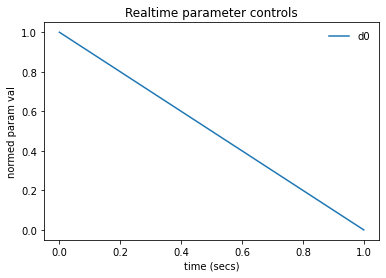

In [25]:
# for plotting in time
t_values = np.linspace(0, numsecs, numDataPoints) #linspace is inclusive of endpoints

fig, ax = plt.subplots()

for pnum in range(numParams) :
    ax.plot(t_values, datain[0,:,pnum], label='d'+str(pnum))
    
#ax.plot(y, color='blue')
#ax.plot(z, color='black')
ax.legend(loc='upper right', frameon=False)
plt.xlabel("time (secs)")
plt.ylabel("normed param val")
plt.title("Realtime parameter controls")
plt.show()